In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, minimize, fmin, minimize_scalar
%matplotlib inline

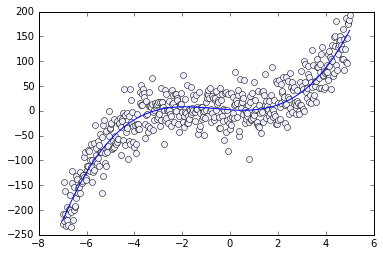

In [2]:
np.random.seed(5) 
x = np.linspace(-7,5, 501) 
y = x**3 + 2*x**2 - 3*x + 2
z = y + np.random.normal(0, 30, 501)
plt.plot(x, z, "o", color='#eeefff') 
plt.plot(x,y) 


In [3]:
def func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

popt, pcov = curve_fit(func, x, z)

In [4]:
print popt

[ 0.9750883   1.98356307 -2.54935169  2.39741864]


In [5]:
type(popt)

numpy.ndarray

In [6]:
def func_min(x,y,sign=1):
    a,b,c,d = popt
    return sign*(a * x**3 + b * x**2 + c * x + d)

In [7]:
def res(x,a=popt[0],b=popt[1],c=popt[2],d=popt[3]):
        return a * x**3 + b * x**2 + c * x + d

In [8]:
def res2(x,a=popt[0],b=popt[1],c=popt[2],d=popt[3]):
        return -a * x**3 - b * x**2 - c * x - d

In [9]:
mini = minimize_scalar(res)

In [10]:
print mini

     fun: 1.7385182322935684
    nfev: 12
     nit: 11
 success: True
       x: 0.47573408841776238


In [11]:
maxi  = minimize_scalar(res2, bounds=(-5, 0), method='bounded')

In [12]:
print maxi

     fun: -7.7296827402452166
 message: 'Solution found.'
    nfev: 9
  status: 0
 success: True
       x: -1.8318936497230667


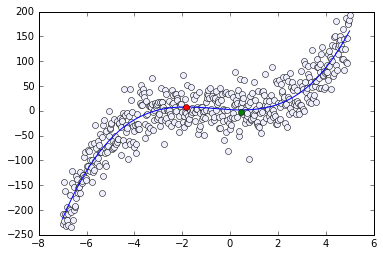

In [13]:
plt.plot(x, z, "o", color = "#eeefff") 
plt.plot(x, res(x), '-', mini.x, -mini.fun, 'o')
plt.plot(maxi.x, -maxi.fun, 'o')
      
plt.show()

Картинка вроде ничего себе такая получилась ٩(⁎❛ᴗ❛⁎)۶
Экстремумы - есть, восстаноленная функция - есть, море точек - есть.